In [7]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn import metrics
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
# import data
data = pd.read_csv("sanger1018_brainarray_ensemblgene_rma.txt", sep='\t')
cellline = pd.read_excel("Cell_Lines_Details.xlsx")
dose = pd.read_excel("v17.3_fitted_dose_response.xlsx")

In [404]:
data.head()

,ensembl_gene,906826,687983,910927,1240138,1240139,906792,910688,1240135,1290812,...,753584,907044,998184,908145,1659787,1298157,1480372,1298533,930299,905954.1
0,ENSG00000000003,7.632023,7.548671,8.712338,7.797142,7.729268,7.074533,3.285198,6.961606,5.943046,...,7.105637,3.236503,3.038892,8.373223,6.932178,8.441628,8.422922,8.089255,3.112333,7.153127
1,ENSG00000000005,2.964585,2.777716,2.643508,2.817923,2.957739,2.889677,2.828203,2.874751,2.686874,...,2.798847,2.745137,2.976406,2.852552,2.622630,2.639276,2.879890,2.521169,2.870468,2.834285
2,ENSG00000000419,10.379553,11.807341,9.880733,9.883471,10.418840,9.773987,10.264385,10.205931,10.299757,...,10.486486,10.442951,10.311962,10.454830,10.418475,11.463742,10.557777,10.792750,9.873902,10.788218
3,ENSG00000000457,3.614794,4.066887,3.956230,4.063701,4.341500,4.270903,5.968168,3.715033,3.848112,...,3.696835,4.624013,4.348524,3.858121,3.947561,4.425849,3.550390,4.443337,4.266828,4.100493
4,ENSG00000000460,3.380681,3.732485,3.236620,3.558414,3.840373,3.815055,3.011867,3.268449,3.352835,...,3.726833,3.947744,3.806584,3.196988,3.814831,4.384732,4.247189,3.071359,3.230197,3.435795


In [405]:
cellline.head()

,Sample Name,COSMIC identifier,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,Methylation,Drug Response,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties
0,A253,906794,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,NaN,MSS/MSI-L,D/F12,Adherent
1,BB30-HNC,753531,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
2,BB49-HNC,753532,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
3,BHY,753535,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
4,BICR10,1290724,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent


In [406]:
dose.head()

,DATASET_VERSION,IC50_RESULTS_ID,COSMIC_ID,CELL_LINE_NAME,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,MAX_CONC_MICROMOLAR,MIN_CONC_MICROMOLAR,LN_IC50,AUC,RMSE,Z_SCORE
0,17.3,1,683665,MC-CAR,1,Erlotinib,EGFR,2.0,0.007812,2.453524,0.982610,0.021678,-0.015505
1,17.3,1482,684055,ES3,1,Erlotinib,EGFR,2.0,0.007812,3.376592,0.985169,0.029915,0.779999
2,17.3,1791,684057,ES5,1,Erlotinib,EGFR,2.0,0.007812,3.614664,0.983207,0.031201,0.985170
3,17.3,2177,684059,ES7,1,Erlotinib,EGFR,2.0,0.007812,3.223394,0.984574,0.093857,0.647971
4,17.3,2754,684062,EW-11,1,Erlotinib,EGFR,2.0,0.007812,2.486405,0.946034,0.087280,0.012832


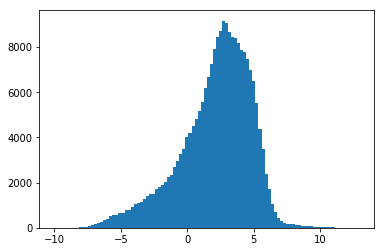

0.25    0.662618
0.50    2.545984
0.75    4.032219
Name: LN_IC50, dtype: float64 2.108973500544153 2.545984


In [188]:
# check the overall distribution of all IC50 over all drugs and all cell lines
#plt.hist(np.exp(dose.LN_IC50)[np.exp(dose.LN_IC50)<250], 200, normed=1, facecolor='g', alpha=0.75)
plt.hist(dose.LN_IC50, 100)
plt.show()
print(dose.LN_IC50.quantile([.25, .5, .75]), np.mean(dose.LN_IC50), np.median(dose.LN_IC50))

In [341]:
dose[dose.DRUG_NAME == 'Bortezomib']

,DATASET_VERSION,IC50_RESULTS_ID,COSMIC_ID,CELL_LINE_NAME,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,MAX_CONC_MICROMOLAR,MIN_CONC_MICROMOLAR,LN_IC50,AUC,RMSE,Z_SCORE
14842,17.3,36,683665,MC-CAR,104,Bortezomib,Proteasome,0.02,0.000078,-3.815183,0.903972,0.047375,1.164582
14843,17.3,1517,684055,ES3,104,Bortezomib,Proteasome,0.02,0.000078,-3.838708,0.874230,0.070250,1.149612
14844,17.3,1826,684057,ES5,104,Bortezomib,Proteasome,0.02,0.000078,-4.397621,0.807655,0.046421,0.793948
14845,17.3,2212,684059,ES7,104,Bortezomib,Proteasome,0.02,0.000078,-7.140496,0.428615,0.125825,-0.951478
14846,17.3,2789,684062,EW-11,104,Bortezomib,Proteasome,0.02,0.000078,-2.708659,0.920519,0.017386,1.868718
14847,17.3,3368,684072,SK-ES-1,104,Bortezomib,Proteasome,0.02,0.000078,-4.061888,0.852474,0.049269,1.007592
14848,17.3,3913,684681,NCI-H1395,104,Bortezomib,Proteasome,0.02,0.000078,-2.874934,0.908460,0.102958,1.762908
14849,17.3,4372,687448,COLO-829,104,Bortezomib,Proteasome,0.02,0.000078,-7.161606,0.437293,0.167250,-0.964911
14850,17.3,8891,687562,8-MG-BA,104,Bortezomib,Proteasome,0.02,0.000078,-8.069708,0.280785,0.126211,-1.542780
14851,17.3,9909,687568,GB-1,104,Bortezomib,Proteasome,0.02,0.000078,-5.792226,0.629465,0.209726,-0.093508


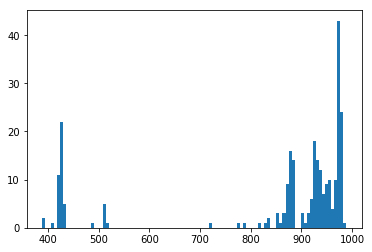

1494    989
230     980
152     980
225     980
203     980
221     980
211     980
208     979
228     979
223     979
238     979
Name: DRUG_ID, dtype: int64

In [48]:
## how many cell lines were drug tested on
plt.hist(dose.DRUG_ID.value_counts(),100)
plt.show()
dose.DRUG_ID.value_counts()[:11]

In [51]:
drug_ids = dose.DRUG_ID.value_counts().index.tolist()
drug_counts = dose.DRUG_ID.value_counts()
drug_counts[drug_ids[0]]
dose.loc[dose['DRUG_ID'] == drug_ids[0]]['DRUG_NAME'].tolist()[0]
",".join([str(i) for i in [1,2,3,4,5]])

'1,2,3,4,5'

In [127]:
test = onedrug_cellline['Cancer Type\n(matching TCGA label)'].astype(str) + onedrug_cellline['Screen Medium'].astype(str)
test[test == 'ACCD/F12'] = 'ONED/F12'
test[test == 'LCMLD/F12'] = 'ONED/F12' 
test.value_counts()

nanR                       106
nanD/F12                    48
LUADR                       36
SCLCR                       33
HNSCD/F12                   30
GBMD/F12                    28
COAD/READR                  27
SKCMD/F12                   26
BRCAD/F12                   25
SKCMR                       24
LUADD/F12                   24
DLBCR                       24
BRCAR                       22
KIRCD/F12                   22
ESCAR                       22
ALLR                        20
COAD/READD/F12              19
LAMLR                       19
MESOR                       18
SCLCD/F12                   18
PAADR                       17
OVD/F12                     17
NBD/F12                     17
BLCAD/F12                   15
LGGD/F12                    14
PAADD/F12                   13
ESCAD/F12                   13
OVR                         13
LIHCD/F12                   11
LUSCR                       10
                          ... 
NBR                         10
CESCD/F1

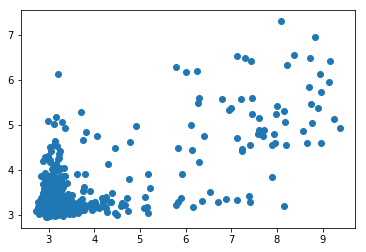

In [91]:
plt.scatter(data.loc[307,:].tolist()[1:], data.loc[460,:].tolist()[1:])
plt.show()

In [44]:
from scipy.stats import pearsonr
pearsonr(data.loc[0,:].tolist()[1:], data.loc[48,:].tolist()[1:])[0]

-0.6008224976479042

### Test some different models using 5-fold cross validation

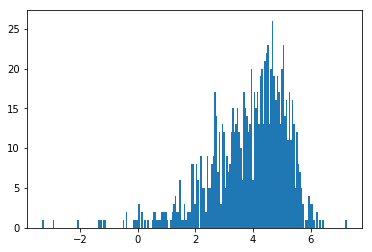

In [343]:
## one drug at a time
drug_id = 211
onedrug_dose = dose.loc[dose.DRUG_ID == drug_id]
plt.hist(onedrug_dose.LN_IC50, 200)
plt.show()

In [344]:
# one drug at a time
# select all cell lines that were tested on the drug
# select and sort rnaseq data by cell line order
onedrug_dose = dose.loc[dose.DRUG_ID == drug_id]
onedrug_ind = [str(x) for x in set(onedrug_dose.COSMIC_ID) if str(x) in data.columns and x in cellline['COSMIC identifier'].tolist()]

onedrug_cellline = cellline[cellline['COSMIC identifier'].isin(onedrug_ind)]
onedrug_data = data[['ensembl_gene'] + [i for i in onedrug_cellline['COSMIC identifier'].astype(str).tolist()]]
onedrug_dose = onedrug_dose[onedrug_dose['COSMIC_ID'].isin(onedrug_ind)]
onedrug_dose['sort'] = pd.Categorical(
    onedrug_dose['COSMIC_ID'].astype(str).tolist(), 
    categories=onedrug_data.columns.tolist(), 
    ordered=True
)
onedrug_dose = onedrug_dose.sort_values('sort')

#onedrug_dose = onedrug_dose.set_index('COSMIC_ID')
#onedrug_dose = onedrug_dose.loc[[i for i in onedrug_cellline['COSMIC identifier'].astype(str).tolist()]]

#plt.hist(onedrug_dose.LN_IC50, 200)
#plt.show()
#onedrug_data = data[data.columns.intersection(onedrug_ind)]
#onedrug_cellline = cellline[cellline.columns.intersection(onedrug_ind)]

In [345]:
print(len(onedrug_ind))
print(onedrug_cellline.shape)
print(onedrug_data.shape)
print(onedrug_dose.shape)

903
(903, 13)
(17737, 904)
(903, 14)


In [498]:
onedrug_data

,906794,753531,753532,753535,1290724,1240121,1240122,753538,910916,753541,...,1659819,1659817,1290767,1290768,1298157,1290771,713869,1298160,1299061,1298218
0,3.260514,6.085170,6.804459,7.987853,7.722962,6.419526,7.646494,7.043881,7.036653,7.473645,...,3.070504,3.293176,7.281493,7.675404,8.441628,7.207275,4.353046,8.686600,7.480317,8.362924
1,2.782798,2.840440,2.920016,2.665458,2.977843,3.182094,2.626819,2.698753,3.114398,2.764982,...,2.811376,2.719466,2.764737,3.103105,2.639276,2.740633,2.652075,2.808921,3.070556,2.831272
2,10.127946,10.374996,9.679912,10.779337,9.979404,9.320548,10.153853,10.928503,10.116037,10.507932,...,10.484793,10.303324,9.807750,10.363883,11.463742,9.992611,9.548978,9.307499,9.925146,10.696233
3,4.313884,4.047315,3.773164,3.838445,3.889085,3.759654,3.564755,3.884052,4.331802,3.998186,...,4.383803,4.476928,4.000466,3.719575,4.425849,4.527079,4.188702,4.004441,4.303307,5.204037
4,3.399067,3.209287,3.366119,3.383024,3.568863,3.802619,3.942749,3.173287,3.502424,3.013444,...,4.368003,4.185209,3.085988,3.094497,4.384732,3.549797,3.435944,3.714197,3.654968,3.121726
5,3.180589,3.131712,3.352411,3.112813,3.298585,3.215753,3.290760,3.310988,3.273236,3.554335,...,3.669690,3.323484,3.303261,3.141884,3.229511,3.330725,3.081963,3.500512,3.235010,3.156705
6,3.544131,3.800243,6.342530,5.939059,5.621657,4.698729,3.551675,5.871991,7.065412,6.749405,...,3.273821,3.411030,6.062765,3.478029,3.571204,3.326228,3.237873,3.944138,3.258338,7.464734
7,7.127068,6.300814,7.575470,7.481447,8.603029,7.873672,8.252413,7.744656,6.714776,7.271109,...,3.771292,6.993451,8.263565,7.789035,8.193000,8.910183,8.536567,8.259752,8.117330,6.564028
8,4.227078,6.247432,5.803498,6.190893,8.425177,6.468239,5.831479,6.758341,7.363202,6.618511,...,5.673716,6.089451,4.338932,5.117950,5.671600,5.654575,8.040431,5.250503,5.238013,6.585097
9,4.700226,5.937834,4.540939,4.306480,5.332800,5.396100,4.716446,5.081162,4.991696,4.821757,...,5.695486,5.302222,5.037021,4.202900,4.943996,4.405255,5.937693,5.333334,4.775515,5.592746


In [496]:
onedrug_cellline

,Sample Name,COSMIC identifier,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,Methylation,Drug Response,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties
0,A253,906794,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,NaN,MSS/MSI-L,D/F12,Adherent
1,BB30-HNC,753531,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
2,BB49-HNC,753532,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
3,BHY,753535,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
4,BICR10,1290724,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
5,BICR22,1240121,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
7,BICR78,1240122,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
8,Ca9-22,753538,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
9,CAL-27,910916,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
10,CAL-33,753541,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent


In [497]:
onedrug_dose

,DATASET_VERSION,IC50_RESULTS_ID,COSMIC_ID,CELL_LINE_NAME,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,MAX_CONC_MICROMOLAR,MIN_CONC_MICROMOLAR,LN_IC50,AUC,RMSE,Z_SCORE,sort
217249,17.3,112341,906794,A253,1494,SN-38,TOP1,0.1,0.000195,-3.884164,0.720125,0.146417,0.143521,906794
217117,17.3,51386,753531,BB30-HNC,1494,SN-38,TOP1,0.1,0.000195,-5.626104,0.469767,0.070274,-0.879344,753531
217118,17.3,51721,753532,BB49-HNC,1494,SN-38,TOP1,0.1,0.000195,-3.111869,0.772842,0.185692,0.597012,753532
217121,17.3,52758,753535,BHY,1494,SN-38,TOP1,0.1,0.000195,-5.576661,0.530474,0.092360,-0.850312,753535
217803,17.3,381933,1290724,BICR10,1494,SN-38,TOP1,0.1,0.000195,-4.539047,0.620954,0.099240,-0.241026,1290724
217714,17.3,340539,1240121,BICR22,1494,SN-38,TOP1,0.1,0.000195,-6.272923,0.382728,0.068349,-1.259156,1240121
217715,17.3,341071,1240122,BICR78,1494,SN-38,TOP1,0.1,0.000195,-5.786763,0.449346,0.066697,-0.973683,1240122
217123,17.3,53378,753538,Ca9-22,1494,SN-38,TOP1,0.1,0.000195,-5.688638,0.459758,0.107240,-0.916064,753538
217604,17.3,286291,910916,CAL-27,1494,SN-38,TOP1,0.1,0.000195,-6.125106,0.398169,0.069869,-1.172359,910916
217126,17.3,54678,753541,CAL-33,1494,SN-38,TOP1,0.1,0.000195,-5.858339,0.436119,0.070723,-1.015713,753541


In [55]:
# stratifiy the data based on GDSC Tissue descriptor, TCGA label, and Screen Medium
temp = onedrug_cellline['Cancer Type\n(matching TCGA label)'].astype(str) + onedrug_cellline['Screen Medium'].astype(str)
stratified_category = temp.replace(temp.value_counts().index[temp.value_counts() == 1], ['one'] * np.sum(temp.value_counts() == 1))

X = onedrug_data.drop(['ensembl_gene'], axis=1).T
y = np.array(onedrug_dose['LN_IC50'].tolist())
skf = StratifiedKFold(n_splits=5)

In [94]:
from sklearn.cross_decomposition import PLSRegression
for train_index, test_index in skf.split(X, stratified_category):
    X_train, X_test = X.iloc[train_index , : ], X.iloc[test_index , : ]
    y_train, y_test = y[train_index], y[test_index]
    
    model = PLSRegression(n_components=10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('PLS:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred) )

PLS: 2.495451166197074 0.2642822304663279
PLS: 2.289399622519666 0.1667355152453608
PLS: 2.783798327879164 0.06981709723256624
PLS: 2.854246099755291 0.10971030007394655
PLS: 2.8496199423828106 0.18973632425199327


In [98]:
#model.fit(X_train, y_train)
y_pred = model.predict(X_train_subset)
print('PLS:', mean_squared_error(y_train, y_pred), r2_score(y_train, y_pred))

PLS: 2.004530737513326 0.35129246858846863


In [95]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

for train_index, test_index in skf.split(X, stratified_category):
    X_train, X_test = X.iloc[train_index , : ], X.iloc[test_index , : ]
    y_train, y_test = y[train_index], y[test_index]
    #print('Train:', y_train.value_counts())
    #print('Test', y_test.value_counts())
    
    model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('RF:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred) )
    
    ind = np.argsort(model.feature_importances_)[-50:]
    X_train_subset = X_train.iloc[:, ind]
    X_test_subset = X_test.iloc[:, ind]
    
    model.fit(X_train_subset, y_train)
    y_pred = model.predict(X_test_subset)
    print('RF_50:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred) )

    model = linear_model.Lasso(alpha=0.1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Lasso:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred) )

    model.fit(X_train_subset, y_train)
    y_pred = model.predict(X_test_subset)
    print('Lasso_50:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred) )
    
    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('KNN:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred) )

    model.fit(X_train_subset, y_train)
    y_pred = model.predict(X_test_subset)
    print('KNN_50:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred) )

    model = AdaBoostRegressor(random_state=0, n_estimators=100)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('AdaBoost:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred) )

    model.fit(X_train_subset, y_train)
    y_pred = model.predict(X_test_subset)
    print('AdaBoost_50:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred) )
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('LM:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred) )
     
    model.fit(X_train_subset, y_train)
    y_pred = model.predict(X_test_subset)
    print('LM_50:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred) )
 
    print('BL:', np.sum((y_test - np.median(y_test)) ** 2) / y_test.shape[0], '\n')

RF: 2.550400805553116 0.2480817827671986
RF_50: 2.498650855349842 0.2633388867541514
Lasso: 2.6131222239016556 0.2295900316023387
Lasso_50: 2.62871507345212 0.2249928923566028
KNN: 2.6609393943414568 0.21549240370325462
KNN_50: 2.7075623763819454 0.2017468506664023
AdaBoost: 2.64627952731683 0.21981447772943363
AdaBoost_50: 2.5398651808847594 0.25118793302437237
LM: 2.887997007759858 0.14855047225508278
LM_50: 2.5129163507528225 0.2591330827691478
BL: 3.399930611396361 

RF: 2.016701840893265 0.2659883386779829
RF_50: 2.06355188459403 0.24893649803773454
Lasso: 2.2085154707896186 0.1961746268592508
Lasso_50: 2.1936753028370677 0.20157594901420295
KNN: 2.6053582161943387 0.05173721081113136
KNN_50: 2.2723513004080957 0.17294053126811804
AdaBoost: 2.1361055827618958 0.2225293914206935
AdaBoost_50: 2.060422752776427 0.25007539680668556
LM: 2.6255035438020826 0.04440498892022127
LM_50: 2.258973594270345 0.17780956649570467
BL: 2.752778179861075 

RF: 2.3967765258091216 0.19913719189548007


In [679]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [689]:
X_test.to_csv('input.csv', encoding='utf-8', index=False)

In [697]:
df = pd.read_csv('input.csv', header=None)

In [103]:
X_train_subset.columns

Int64Index([12827, 13150, 11273,  8455,  1987, 12776, 11753, 15542,  5014,
            11589, 17401,  3661, 15896,  1024, 12869,  7874,  8704,  1716,
             3895, 10372,  2383,   808, 10995,  7206,  2422, 10483,  5854,
            11527, 12700,  1571,  4792,  1422,  4770, 14071,   588, 13918,
            16778,   132,  2759,  1770,  6991,  3105,  9988,  5126, 14772,
             1622,  5228, 10009,  3549,  5142],
           dtype='int64')

In [107]:
data.shape

(17737, 1019)

## Model building

### Prepare the data

In [57]:
# construct training and testing data, where 20% is used as testing
y = pd.DataFrame([onedrug_dose.loc[onedrug_dose.COSMIC_ID == int(x), 'LN_IC50'].tolist()[0] for x in onedrug_data.columns])
X = onedrug_data.T

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # test size 20%
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

ValueError: invalid literal for int() with base 10: 'ensembl_gene'

<function matplotlib.pyplot.show>

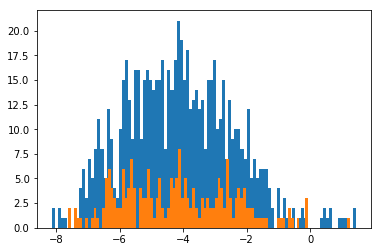

In [572]:
plt.hist(y_train,100)
plt.show
plt.hist(y_test,100)
plt.show

In [336]:
model = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [345]:
(model.feature_importances_)

array([0., 0., 0., ..., 0., 0., 0.])

In [321]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

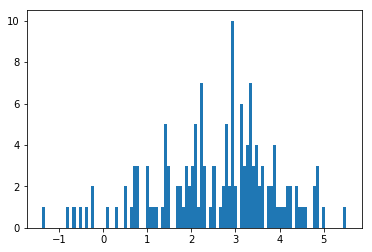

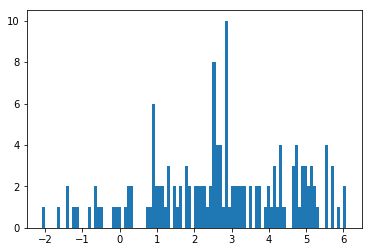

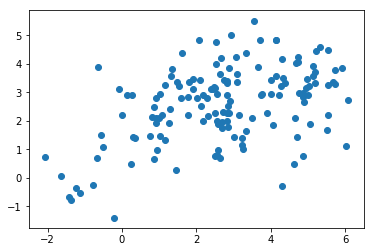

In [61]:
plt.hist(y_pred,100)
plt.show()
plt.hist(y_test,100)
plt.show()
plt.scatter(y_test, y_pred)
plt.show()

In [70]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test[y_test<1], y_pred[y_test<1])

3.1394048735152444

In [50]:
np.sum((y_test - np.median(y_test)) ** 2) / (y_test.shape[0] - 1)

NameError: name 'y_test' is not defined

In [219]:
# algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('RFC', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SGD', SGDClassifier()))

# evaluate each model in turns by accuracy
for name, model in models:
    results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy') # cv = 10: 10-fold
    print(name, results.mean()*100, '+/-',results.std()*100)
    
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Confusion matrix:", metrics.confusion_matrix(y_test, y_pred))

LR 85.25107803588817 +/- 2.6614993563087235
Accuracy: 0.7857142857142857
Confusion matrix: [[149   9]
 [ 33   5]]
RFC 85.12607645519039 +/- 1.8461276566725935
Accuracy: 0.8010204081632653
Confusion matrix: [[153   5]
 [ 34   4]]
KNN 84.99787132698525 +/- 2.3789597584189406
Accuracy: 0.8061224489795918
Confusion matrix: [[151   7]
 [ 31   7]]
GNB 80.51556038897812 +/- 2.7221653554940994
Accuracy: 0.7857142857142857
Confusion matrix: [[134  24]
 [ 18  20]]
SGD 80.2359244131396 +/- 7.529381631759483
Accuracy: 0.7755102040816326
Confusion matrix: [[143  15]
 [ 29   9]]


### Test

In [252]:
import json
confs = {}
model_dir = '/Users/YaoSen/Desktop/conf/'
model_paths = [join(model_dir, f) for f in listdir(model_dir) if isfile(join(model_dir, f))]
for i in model_paths: 
    print(i)
    with open(i) as data_file:
        js = json.load(data_file)
        confs = {**confs, **js}

/Users/YaoSen/Desktop/conf/FMK.json
/Users/YaoSen/Desktop/conf/CHIR-99021.json
/Users/YaoSen/Desktop/conf/Pevonedistat.json
/Users/YaoSen/Desktop/conf/AKT inhibitor VIII.json
/Users/YaoSen/Desktop/conf/Wee1 Inhibitor.json
/Users/YaoSen/Desktop/conf/Dacinostat.json
/Users/YaoSen/Desktop/conf/WHI-P97.json
/Users/YaoSen/Desktop/conf/T0901317.json
/Users/YaoSen/Desktop/conf/Etoposide.json
/Users/YaoSen/Desktop/conf/Linsitinib.json
/Users/YaoSen/Desktop/conf/OSI-930.json
/Users/YaoSen/Desktop/conf/TL-2-105.json
/Users/YaoSen/Desktop/conf/GSK1070916.json
/Users/YaoSen/Desktop/conf/IPA-3.json
/Users/YaoSen/Desktop/conf/Phenformin.json
/Users/YaoSen/Desktop/conf/GW843682X.json
/Users/YaoSen/Desktop/conf/FR-180204.json
/Users/YaoSen/Desktop/conf/PLX-4720.json
/Users/YaoSen/Desktop/conf/Fedratinib.json
/Users/YaoSen/Desktop/conf/JW-7-52-1.json
/Users/YaoSen/Desktop/conf/UNC1215.json
/Users/YaoSen/Desktop/conf/GSK1904529A.json
/Users/YaoSen/Desktop/conf/Pictilisib.json
/Users/YaoSen/Desktop/conf/

/Users/YaoSen/Desktop/conf/Tozasertib.json
/Users/YaoSen/Desktop/conf/CCT007093.json
/Users/YaoSen/Desktop/conf/MG-132.json
/Users/YaoSen/Desktop/conf/S-Trityl-L-cysteine.json
/Users/YaoSen/Desktop/conf/SB52334.json
/Users/YaoSen/Desktop/conf/Entinostat.json
/Users/YaoSen/Desktop/conf/JW-7-24-1.json
/Users/YaoSen/Desktop/conf/HG-5-113-01.json
/Users/YaoSen/Desktop/conf/DMOG.json
/Users/YaoSen/Desktop/conf/HG-5-88-01.json
/Users/YaoSen/Desktop/conf/Axitinib.json
/Users/YaoSen/Desktop/conf/AICA Ribonucleotide.json
/Users/YaoSen/Desktop/conf/Vinblastine.json
/Users/YaoSen/Desktop/conf/Tivozanib.json
/Users/YaoSen/Desktop/conf/XMD8-92.json
/Users/YaoSen/Desktop/conf/Mitomycin-C.json
/Users/YaoSen/Desktop/conf/Ispinesib Mesylate.json
/Users/YaoSen/Desktop/conf/Veliparib.json
/Users/YaoSen/Desktop/conf/(5Z)-7-Oxozeaenol.json
/Users/YaoSen/Desktop/conf/KIN001-244.json
/Users/YaoSen/Desktop/conf/Genentech Cpd 10.json
/Users/YaoSen/Desktop/conf/CGP-082996.json
/Users/YaoSen/Desktop/conf/XMD8-85

In [255]:
with open('/Users/YaoSen/Desktop/insight_project/dash/conf/parms.json', 'w') as outfile:
    json.dump(confs, outfile)

In [256]:
with open('/Users/YaoSen/Desktop/insight_project/dash/conf/parms.json') as infile:
    params = json.load(infile)

In [268]:
import os
os.getcwd()

'/Users/YaoSen/Desktop/insight_project'

In [342]:
x = data[['ensembl_gene', '687807']]
import csv
x.to_csv('patient3.csv', encoding='utf-8', index=False)

In [289]:
df = pd.read_csv('patient1.csv', header=None, index_col=0)
df.loc[['ENSG00000000005', 'ENSG00000000430']]

,1
0,
ENSG00000000005,2.964585
ENSG00000000430,NaN


In [295]:
from sklearn.externals import joblib
model = joblib.load('dash/models/Vismodegib_model.sav')
params[drug_name][3] = 'ENSG00010141934'

In [318]:
drug_name = 'Vismodegib'
x = df.loc[params[drug_name]]
x = x.fillna(0)
model.predict(x.T)[0]

4.672986089024061

In [326]:
ic50s = [4,2,5,7,6,3,13,45,2]
idx = np.array(ic50s).argsort()[:3]
[ic50s[i] for i in idx]

[2, 2, 3]

In [366]:
onedrug_name

'TL-1-85'

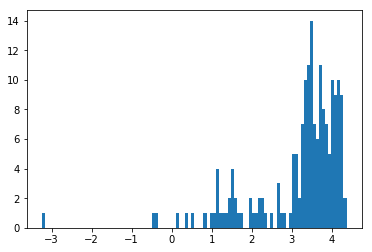

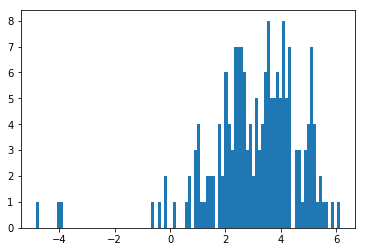

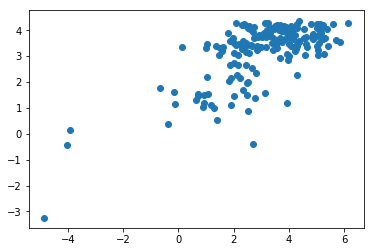

In [381]:
drug_id = 261
onedrug_name = dose.loc[dose['DRUG_ID'] == drug_id]['DRUG_NAME'].tolist()[0]
onedrug_dose = dose.loc[dose.DRUG_ID == drug_id]

# select all cell lines that were tested on the drug
# select and sort rnaseq data by cell line order
onedrug_dose = dose.loc[dose.DRUG_ID == drug_id]
onedrug_ind = [str(x) for x in set(onedrug_dose.COSMIC_ID) if str(x) in data.columns and x in cellline['COSMIC identifier'].tolist()]

onedrug_cellline = cellline[cellline['COSMIC identifier'].isin(onedrug_ind)]
onedrug_data = data[['ensembl_gene'] + [i for i in onedrug_cellline['COSMIC identifier'].astype(str).tolist()]]
onedrug_dose = onedrug_dose[onedrug_dose['COSMIC_ID'].isin(onedrug_ind)]
onedrug_dose['sort'] = pd.Categorical(
    onedrug_dose['COSMIC_ID'].astype(str).tolist(),
    categories=onedrug_data.columns.tolist(),
    ordered=True
)
onedrug_dose = onedrug_dose.sort_values('sort')


temp = onedrug_cellline['Cancer Type\n(matching TCGA label)'].astype(str) + onedrug_cellline['Screen Medium'].astype(str)
stratified_category = temp.replace(temp.value_counts().index[temp.value_counts() == 1], ['nanR'] * np.sum(temp.value_counts() == 1))

## First random forest
X = onedrug_data.drop(['ensembl_gene'], axis=1).T
y = np.array(onedrug_dose['LN_IC50'].tolist())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=stratified_category) # test size 20%

model = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
model.fit(X_train, y_train)

## save important genes
importance_idx = np.argsort(model.feature_importances_)
important_genes = {onedrug_name: onedrug_data['ensembl_gene'][importance_idx[-50:]].tolist()}
#filepath = './conf/'+ onedrug_name + '.json'
#with open(filepath, 'w') as outfile:
#    json.dump(important_genes, outfile)

## second random forest
X_train_subset = X_train.iloc[:, importance_idx[-100:]]
X_test_subset = X_test.iloc[:, importance_idx[-100:]]
model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=200)
model.fit(X_train_subset, y_train)
y_pred = model.predict(X_test_subset)

plt.hist(y_pred,100)
plt.show()
plt.hist(y_test,100)
plt.show()
plt.scatter(y_test, y_pred)
plt.show()

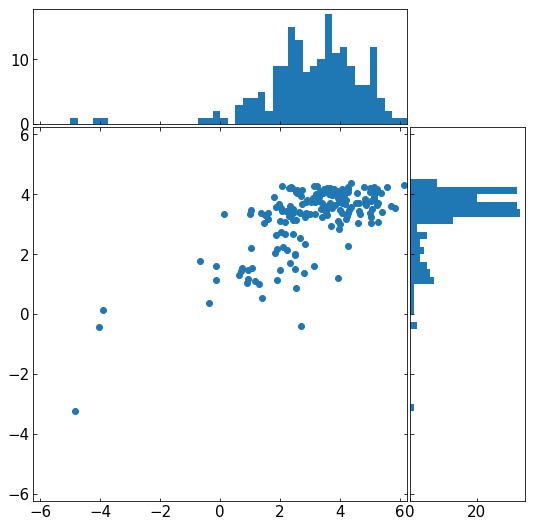

In [385]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True, labelsize=15)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False, labelsize=15)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False, labelsize=15)

# the scatter plot:
ax_scatter.scatter(y_test, y_pred)

# now determine nice limits by hand:
binwidth = 0.25
lim = np.ceil(np.abs([y_test, y_pred]).max() / binwidth) * binwidth
ax_scatter.set_xlim((-lim, lim))
ax_scatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(y_test, bins=bins)
ax_histy.hist(y_pred, bins=bins, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()